# QI Relaxometry

Import the quantum impurity (QI) relaxometry module.

In [34]:
import sys
import os
sys.path.append(os.path.abspath('../src/'))
from qi_relaxometry import RelaxationRate, ZFS, GAMMA

### Import supporting modules.

In [35]:
import numpy as np
from numpy import pi, linspace, empty_like
import matplotlib.pyplot as plt
import matplotlib.colors as colors

### Call `RelaxationRate` class and choose parameters.

In [36]:
B_ext = 31e-3
Gamma = RelaxationRate(bext=B_ext,  
                       quadrants="all", 
                       zoom_in_heatmap=1.5,
                       film_thickness=235e-9)

### Check the input arguments.

In [37]:
Gamma.init_locals

{'self': <qi_relaxometry.RelaxationRate at 0x7f8d49a87070>,
 'M_saturation': 142000.0,
 'Gilbert_damping': 0.0001,
 'A_exchange': 3.7e-12,
 'dir_nv': [1, 1, 1],
 'phi_nv': 0.0,
 'omega': None,
 'plusmin': -1,
 'bext': 0.031,
 'theta_bext': 0.9546951008408984,
 'distance_nv': 1.09e-07,
 'film_thickness': 2.35e-07,
 'quadrants': 'all',
 'zoom_in_heatmap': 1.5}

### Get kx, ky meshgrids. Create integrand meshgrid corresponding to kx and ky.

If creating high-res 2D meshgrid plots, use at least `x_pixels = 500` and `y_pixels = 500`.

If calculating rate $\Gamma$ vs field $B_{ext}$, use `x_pixels = 200` and `y_pixels = 6000`.

In [38]:
Gamma.create_k_bounds()
Gamma.create_k_meshgrids(x_pixels=1000, y_pixels=1000)
Gamma.calculate_sum_di_dj_cij()
Gamma.create_integrand_grid_exclude_nv_distance()
Gamma.create_integrand_grid_include_nv_distance()

### Get $k_x$, $k_y$ and $\Gamma$ integrand.

In [39]:
X = Gamma.kx * 1e-6 / (2*pi)  # 2D numpy array [1/um]
Y = Gamma.ky * 1e-6 / (2*pi)  # 2D numpy array [1/um]
Z = Gamma.integrand_grid_include_nv_distance  # 2D numpy array [rad Hz]

### Calculate minimum and maximum element in $\Gamma$ integrand array.

In [40]:
vmin = np.amin(Z)
vmax = np.amax(Z)

vmin, vmax

(1.2562860455226773e-14, 0.0024013882427123697)

### Create a directory to save plot figures.

In [41]:
path = "plot-figures"

# create directory in current folder
os.mkdir(path) if not os.path.exists(path) else None

path_txt = os.path.join(path, "txt_files")
path_fig = os.path.join(path, "figures")
os.mkdir(path_txt) if not os.path.exists(path_txt) else None
os.mkdir(path_fig) if not os.path.exists(path_fig) else None

print(f"Created: \n\t.{path_txt}")
print(f"Created: \n\t.{path_fig}")

Created: 
	.plot-figures/txt_files
Created: 
	.plot-figures/figures


### Save meshgrid in txt files

Can be used for replotting in MATLAB.

In [42]:
B = B_ext * 1e4  # external magnetic field [Gauss]
path_txt_X = os.path.join(path, f"heatmap_{B:.0f}G_X.txt")
path_txt_Y = os.path.join(path, f"heatmap_{B:.0f}G_Y.txt")
path_txt_Z = os.path.join(path, f"heatmap_{B:.0f}G_Z.txt")
np.savetxt(path_txt_X, X, header=f"Meshgrid kx [1/um]; B_ext = {B:.0f} Gauss")
np.savetxt(path_txt_Y, Y, header=f"Meshgrid ky [1/um]; B_ext = {B:.0f} Gauss")
np.savetxt(path_txt_Z, Z, header=f"Log of Gamma integrand [Hz]; B_ext {B:.0f} Gauss")
print(f"Saved in: \n\t{path_txt_X}\n\t{path_txt_Y}\n\t{path_txt_Z}")

Saved in: 
	plot-figures/heatmap_310G_X.txt
	plot-figures/heatmap_310G_Y.txt
	plot-figures/heatmap_310G_Z.txt


### Plot $\Gamma$ integrand 2D heatmap using `pyplot.pcolormesh` in $\log_{10}$ scale.

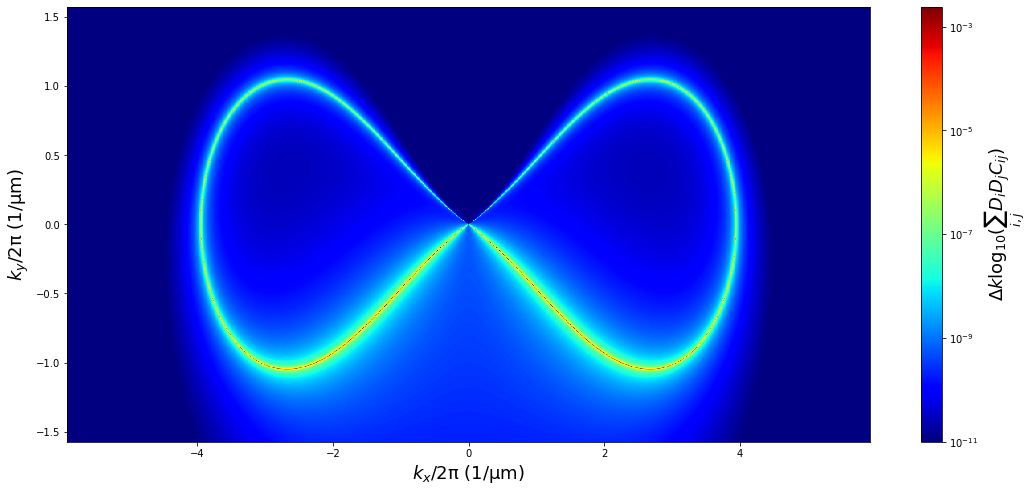

In [43]:
fig1, ax1 = plt.subplots(figsize=(18,8))

ax1.set_xlabel(r"$k_x/2\mathregular{\pi}$ (1/$\mathregular{\mu}$m)", fontsize=18)
ax1.set_ylabel(r"$k_y/2\mathregular{\pi}$ (1/$\mathregular{\mu}$m)", fontsize=18)
im1 = ax1.pcolormesh(X, Y, Z, cmap='jet', norm=colors.LogNorm(vmin=1e-11, vmax=vmax), shading="auto")
cbar1 = fig1.colorbar(im1)
cbar1.set_label(r"$\Delta k \log_{10}(\sum_{i,j} D_i D_j C_{ij})$", fontsize=18)

### Save figure

In [44]:
path_to_file = os.path.join(path_fig, "heatmap_logscale.png")
fig1.savefig(path_to_file)
print(f"Plot saved in: \n\t{path_to_file}")

Plot saved in: 
	plot-figures/figures/heatmap_logscale.png


### Plot $\Gamma$ integrand 2D heatmap using `pyplot.pcolormesh` in normal scale.

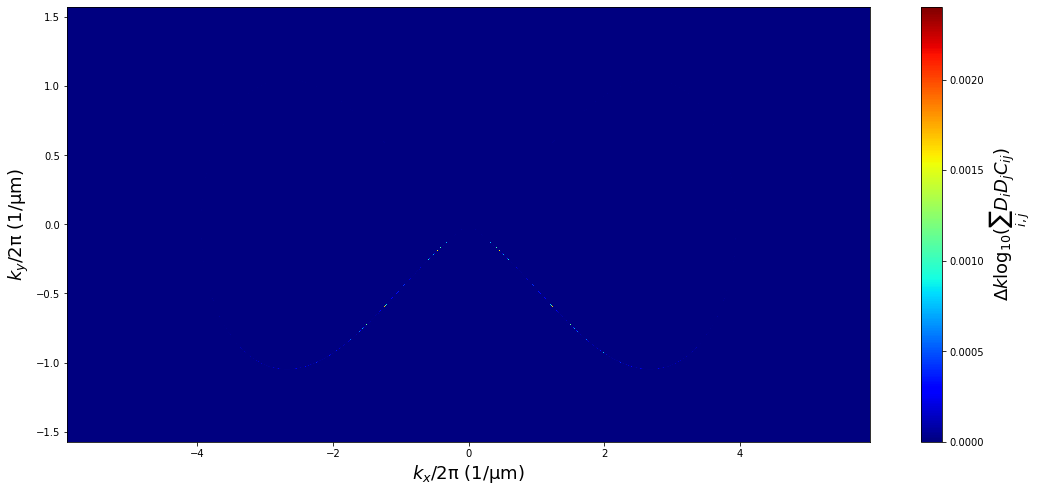

In [45]:
fig2, ax2 = plt.subplots(figsize=(18,8))
ax2.set_xlabel(r"$k_x/2\mathregular{\pi}$ (1/$\mathregular{\mu}$m)", fontsize=18)
ax2.set_ylabel(r"$k_y/2\mathregular{\pi}$ (1/$\mathregular{\mu}$m)", fontsize=18)
im2 = ax2.pcolormesh(X, Y, Z, cmap='jet', shading="auto")
cbar2 = fig2.colorbar(im2)
cbar2.set_label(r"$\Delta k \log_{10}(\sum_{i,j} D_i D_j C_{ij})$", fontsize=18)

### Save figure

In [46]:
path_to_file = os.path.join(path_fig, "heatmap_logscale.png")
fig2.savefig(path_to_file)
print(f"Plot saved in: \n\t{path_to_file}")

Plot saved in: 
	plot-figures/figures/heatmap_logscale.png


## Rate vs. external magnetic field

In [23]:
def get_rate_vs_field():
    x = linspace(1e-3, 32e-3, 31)
    y = empty_like(x)
    for i in range(len(x)):
        rate = RelaxationRate(bext=x[i], quadrants="I+IV")
        rate.quadrant_factor = 2  # symmetry in kx so we only calculate quadrants I+IV
        rate.calculate_relaxation_rate_in_MHz(x_pixels=100, y_pixels=4000)
        y[i] = rate.rate_in_MHz
    return x, y

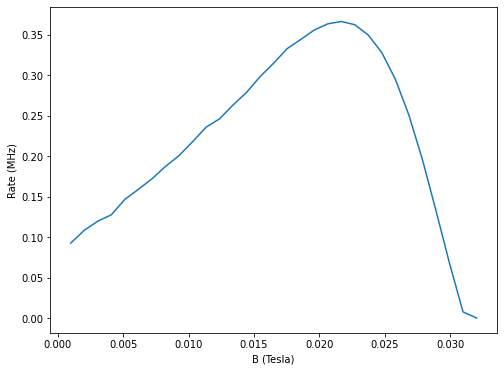

In [25]:
B, rate = get_rate_vs_field()

fig3, ax3 = plt.subplots(figsize=(8,6))
plt.plot(B, rate)
plt.xlabel("B (Tesla)")
plt.ylabel("Rate (MHz)")
plt.show()

## NV distance dependency

In [28]:
def get_rate_vs_distance(B = 25e-3):
    x = np.geomspace(50e-9, 500e-9, 100)
    y = np.empty_like(x)
    rate = RelaxationRate(bext=B)
    rate.create_k_bounds()
    rate.create_k_meshgrids(x_pixels=100, y_pixels=4000)
    rate.calculate_sum_di_dj_cij()
    rate.create_integrand_grid_exclude_nv_distance()
    for i in range(len(x)):
        rate.distance_nv = x[i]
        rate.create_integrand_grid_include_nv_distance()
        y[i] = rate.rate_in_MHz
    return x, y

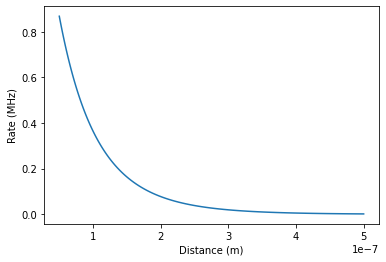

In [29]:
d, r = get_rate_vs_distance()
plt.plot(d, r)
plt.xlabel("Distance (m)")
plt.ylabel("Rate (MHz)")
plt.show()

## Spin-wave dispersion: DESWs and BVSWs

In [30]:
Gamma1 = RelaxationRate(film_thickness=235e-9)

In [31]:
k = np.linspace(0, 8e6 * 2 * pi, 10000)

In [32]:
# BVSW (ky=0)
Gamma1.kx = k
Gamma1.ky = np.zeros_like(k)
Gamma1.create_w_meshgrids()
omega_bvsw = Gamma1.omega_spin_wave_dispersion()

# DESW (kx=0)
Gamma1.ky = k
Gamma1.kx = np.zeros_like(k)
Gamma1.create_w_meshgrids()
omega_desw = Gamma1.omega_spin_wave_dispersion()

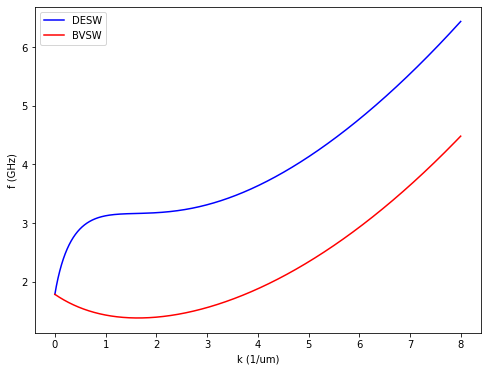

In [33]:
plt.figure(figsize=(8,6))
plt.plot(k*1e-6/(2*pi), omega_desw*1e-9/(2*pi), label="DESW", c='b')
plt.plot(k*1e-6/(2*pi), omega_bvsw*1e-9/(2*pi), label="BVSW", c='r')
plt.xlabel("k (1/um)")
plt.ylabel("f (GHz)")
plt.legend()